 # Machine learning to determine the chances for getting heart disease
 Using features like age, bp and so forth

In [28]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 
import matplotlib.pyplot as plt

In [41]:
#import file
df = pd.read_csv(r'C:\Users\alext\Desktop\kidney_disease.csv')
# df = df.dropna() # remove nan value

# data frame info
print(df.shape)
#print(df.head)
# print(df.info())
print(df.columns) 
# df['bp'].unique()  # check bp categorical features


(400, 26)
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [42]:
# check distinct value
# print(df[:].nunique()) 
print(df.dtypes)

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [34]:
print(df['rbc'].unique())

onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(df.rbc.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["rbc_"+str(int(i)) for i in range(df.shape[1])]) 
df = pd.concat([df, dfOneHot], axis=1)

#droping the country column 
df= df.drop(['rbc'], axis=1) 
#printing to verify 
print(df.head())


['normal' 'abnormal']


ValueError: Shape of passed values is (158, 2), indices imply (158, 26)

In [50]:
onehot_encoder = OneHotEncoder()
encoder_df = pd.DataFrame(onehot_encoder.fit_transform(df[['rbc']]).toarray())
#final_df = df.join(encoder_df)

encoder_df.columns = onehot_encoder.get_feature_names(['rbc'])

final_df= pd.concat([df, encoder_df ], axis=1)
print(final_df.head)

ValueError: input_features should have length equal to number of features (26), got 400

auto encode and name it with column name

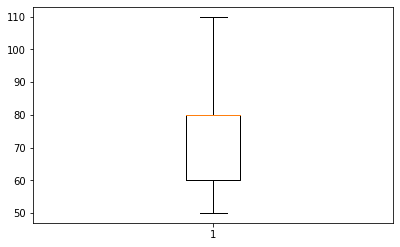

In [13]:
# data visualisation

fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df['bp'])
plt.show()


fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df['bp'])
plt.show()

In [31]:
# Split dataset into random train and test subsets:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 


print(X.shape, y.shape)
print(X_train[:5, :])
print(y_train[:5])

(158, 25) (158,)
[[299 73.0 60.0 1.02 0.0 0.0 'normal' 'normal' 'notpresent' 'notpresent'
  127.0 48.0 0.5 150.0 3.5 15.1 '52' '11000' '4.7' 'no' 'no' 'no' 'good'
  'no' 'no']
 [292 30.0 80.0 1.02 0.0 0.0 'normal' 'normal' 'notpresent' 'notpresent'
  89.0 42.0 0.5 139.0 5.0 16.7 '52' '10200' '5.0' 'no' 'no' 'no' 'good'
  'no' 'no']
 [352 37.0 60.0 1.02 0.0 0.0 'normal' 'normal' 'notpresent' 'notpresent'
  109.0 47.0 1.1 141.0 4.9 15.0 '48' '7000' '5.2' 'no' 'no' 'no' 'good'
  'no' 'no']
 [171 83.0 70.0 1.02 3.0 0.0 'normal' 'normal' 'notpresent' 'notpresent'
  102.0 60.0 2.6 115.0 5.7 8.7 '26' '12800' '3.1' 'yes' 'no' 'no' 'poor'
  'no' 'yes']
 [255 34.0 80.0 1.025 0.0 0.0 'normal' 'normal' 'notpresent' 'notpresent'
  121.0 27.0 1.2 144.0 3.9 13.6 '52' '9200' '6.3' 'no' 'no' 'no' 'good'
  'no' 'no']]
['notckd' 'notckd' 'notckd' 'ckd' 'notckd']


In [32]:
# fit the model
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'normal'